# Investigating Fandango Movie Ratings

## 1. Introduction

In 2015, online movie ratings aggregator Fandango.com was accused of using a biased and dishonest rating system. FiveThirtyEight journalist Walt Hickey published [an article](https://fivethirtyeight.com/features/fandango-movies-ratings/) in which he presented strong evidence to support the suggestions. Fandango's movie ratings were almost always rounded up to the nearest half-point from their original scores. For example, a 4.1 movie would be rounded off to 4.5 stars, instead of 4. As a result, Fandango.com has structurally rated movies higher than other prominent movie reviewers. Fandango's officials have stated that the rounding off was caused by a bug rather than being intentional, and promised to fix it. 

This project will look at more recent movie ratings data to investigate whether Fandango.com has addressed the issue. It will compare the ratings for popular movies from 2016 to ratings from 2015, to find out whether Fandango have indeed adjusted its movie rating system.

## 2. Importing and preparing the data

In [293]:
import pandas as pd

data_15 = pd.read_csv('fandango_score_comparison.csv')
data_16 = pd.read_csv('movie_ratings_16_17.csv')

In [294]:
# selecting only the columns that will be of use
data_15 = data_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
data_16 = data_1617[['movie', 'year', 'fandango']]

In [295]:
# checking the number of rows in each data set
print('2015', data_15.shape,'\n', '2016', data_16.shape)

2015 (146, 5) 
 2016 (214, 3)


In [296]:
# isolating movies released in 2016 in the data_16 data set
data_16 = data_16[data_16['year'] == 2016].copy()

print(data_16.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 3 columns):
movie       191 non-null object
year        191 non-null int64
fandango    191 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB
None


In [297]:
# isolating movies released in 2015 in the data_16 data set
data_15 = data_15[data_15['FILM'].str.contains('(2015)')].copy()

print(data_15.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 5 columns):
FILM                    129 non-null object
Fandango_Stars          129 non-null float64
Fandango_Ratingvalue    129 non-null float64
Fandango_votes          129 non-null int64
Fandango_Difference     129 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB
None


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



## 3. Comparing Distribution Shapes for 2015 and 2016

Having prepared and cleaned the data sets, we now have a data set with movies released in 2015 containing 129 popular movies, and a set with movies released in 2016 containing 191 movies. Below we create a kernel density plot for each year, so that we can compare the distribution of movie ratings in each year. We expect to see a distribution skewed to the left for 2015 and a more normal - or at least less skewed - distribution for 2016.

In [298]:
from matplotlib import pyplot as plt
%matplotlib inline

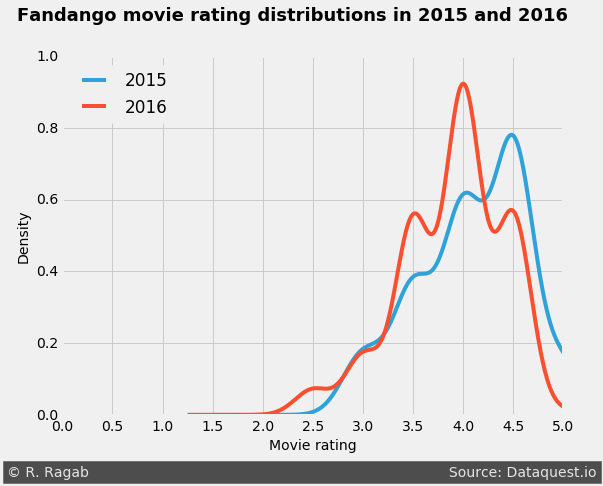

In [305]:
fig, ax1 = plt.subplots(figsize=(8,6))
data_15['Fandango_Stars'].plot.kde(ax=ax1, label = '2015')
data_16['fandango'].plot.kde(ax=ax1, label = '2016')
ax1.text(-0.45, 1.1, 'Fandango movie rating distributions in 2015 and 2016', size = 18, weight='bold')
ax1.text(-0.55, -0.17, '© R. Ragab' + 80*' ' + 'Source: Dataquest.io', color='0.9', backgroundcolor='0.3')
ax1.set_xlabel('Movie rating', size=14)
ax1.set_ylabel('Density', size = 14)
ax1.set_xlim(0,5)
ax1.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.style.use('fivethirtyeight')
plt.legend(loc='upper left')
plt.show()

#### Analysis

Our kernel density plot shows a substantial change between movie ratings in 2015 and 2016. As expected, the 2015 movie ratings show a distribution that is heavily skewed to the left, peaking at a rating of 4.5 stars. The 2016 data however, resembles more of a normal distribution peaking at 4.0 stars. The distribution is still skewed to the left, but this is not necessarily problematic, taking into account that our samples consist of popular movies only. We observe a more normal distribution of Fandango's movie rating scores for movies released in 2016, and lower scores overall.

## 4. Comparing Relative Frequencies

While the kernel density plot gave us some good insights, one thing that has to be taken into consideration is the fact that the 2016 data set contained almost 1.5 times as many movies as the 2015 data set. To confirm that Fandango has given lower scores in 2016, we will now analyze the relative frequency distributions for each year. Below are two frequency tables, each displaying the percentual frequency distribution for a particular year.

In [300]:
print('2015' + '\n' + '-' * 15) 
data_15['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
---------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [301]:
print('2016' + '\n' + '-' * 15)
data_16['fandango'].value_counts(normalize=True).sort_index() * 100

2016
---------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

#### Analysis
The frequency tables for the 2015 and 2016 data sets are clearly different from one another. Each frequency table's outcomes largely correspond to the kernel density plot; the 2015 frequency table shows a stepwise increase from the 3.0 rating to the 4.5 rating, while the 2016 table shows a peak at the 4.0 rating, with the values for 3.5 and 4.5 being nearly identical to each other. However, there was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. As 3.5 and 4.0 are high ratings, this challenges the direction of the change we saw on the kernel density plots.

## 5. Determining the Direction of the Change

In this section we will take a couple of summary metrics to get a more precise picture about the direction of the change. We will compare the mean, median and mode of Fandango's movie rating scores in 2015 to 2016, and visualize it as a table and a bar chart. The results will be discussed in the following section, the conclusion of this project.

In [302]:
mean_15 = data_15['Fandango_Stars'].mean()
median_15 = data_15['Fandango_Stars'].median()
mode_15 = data_15['Fandango_Stars'].mode()[0]

mean_16 = data_16['fandango'].mean()
median_16 = data_16['fandango'].median()
mode_16 = data_16['fandango'].mode()[0]

# creating a new dataframe and adding the metrics for each year as a list
statistics = pd.DataFrame()
statistics['2015'] = [mean_15, median_15, mode_15]
statistics['2016'] = [mean_16, median_16, mode_16]
statistics.index = ['mean', 'median', 'mode']

In [303]:
statistics

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


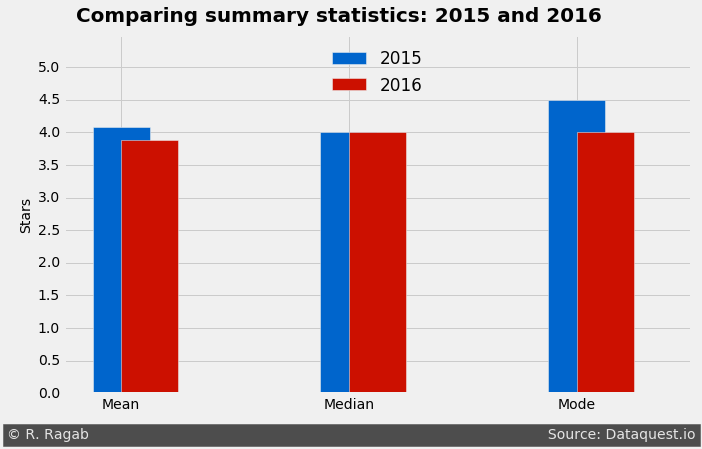

In [304]:
import numpy as np
from numpy import arange # this will be needed to arange the y-axis ticks

fig, ax2 = plt.subplots(figsize = (10,6))
plt.style.use('fivethirtyeight')
statistics['2015'].plot.bar(color = '#0065CC', align = 'center', label = '2015', width = .25, ax=ax2)
statistics['2016'].plot.bar(color = '#CC1000', align = 'edge', label = '2016', width = .25,
                         rot = 0, ax=ax2)

ax2.text(-0.2, 5.7, 'Comparing summary statistics: 2015 and 2016', size = 20, weight='bold')
ax2.text(-0.5, -0.7, '© R. Ragab' + 102*' ' + 'Source: Dataquest.io', color='0.9', backgroundcolor='0.3')
ax2.set_xticklabels(['Mean', 'Median', 'Mode'])
ax2.set_ylabel('Stars', size=14)

plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.legend(framealpha = 0, loc='upper center')
plt.show()

## 6. Conclusion

In this project our goal was to determine whether Fandango has adjusted its movie rating system following the criticism in 2015. Our data, consisting of a sample of only popular movies released in 2015 and 2016, prompted us to change the question: did Fandango's movie rating scores for popular movies change between 2015 and 2016? We observed a clear change in the distribution of frequency distributions; in 2016, less movies scored a 4.5 or 5.0, and more movies scored a 3.5 or 4.0 compared to 2015. We then took a couple of summary metrics to compare the mean, median and mode scores of 2015 and 2016. The mean movie rating dropped from 4.09 in 2015 to 3.89 in 2016, meaning that the most popular movies received lower scores on average than in the previous year. The median score remained 4.0. Finally, the mode declined from 4.5 in 2015 to 4.0 in 2016. This is important because it indicates that in 2016, most of the popular movies received a 4.0, which is half a point lower than it was in 2015. We do not have the data to determine what caused this change; has Fandango changed its movie rating system, or do we have to look at other factors to explain this change? However, given the fact that one point of criticism aimed at Fandango was that it rounded its ratings up to the nearest half point - which no longer occurred in 2016 - it seems likely that this issue has been addressed. 